In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Première partie : Application de différents algorithmes sur le dataset des Crédits bancaires

## 1 - Récupération du dataset

In [2]:
column_names = [
    "Statut du compte courant existant", "Durée en mois", "Historique de crédit",
    "Objectif", "Montant du crédit", "Compte d'épargne", "Emploi actuel depuis",
    "Taux de versement en, pourcentage du revenu disponible",
    "Statut personnel et sexe", "Autres débiteurs", "Résidence actuelle depuis",
    "Propriété", "Age en années", "Autres plans de versement", "Logement",
    "Nombre de crédits existants dans cette banque", "Travail",
    "Nombre de personnes à charge", "Téléphone", "Travailleur étranger","Client_Bon"
]

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv"
dataset = pd.read_csv(url, header=None)
dataset.columns = column_names

In [4]:
dataset.head()

,Statut du compte courant existant,Durée en mois,Historique de crédit,Objectif,Montant du crédit,Compte d'épargne,Emploi actuel depuis,"Taux de versement en, pourcentage du revenu disponible",Statut personnel et sexe,Autres débiteurs,...,Propriété,Age en années,Autres plans de versement,Logement,Nombre de crédits existants dans cette banque,Travail,Nombre de personnes à charge,Téléphone,Travailleur étranger,Client_Bon
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
# On modifie le target pour avoir 0 et 1 au lieu de 1 et 2
dataset["Client_Bon"] = dataset["Client_Bon"] -1
dataset["Client_Bon"].head()

0    0
1    1
2    0
3    0
4    1
Name: Client_Bon, dtype: int64

In [6]:
# On récupère la cible
y = dataset.pop("Client_Bon")

In [7]:
# On divise le dataset en variables qualtitavies et quantitatives
variables_quantitatives = dataset.select_dtypes(include=['int64', 'float64'])
variables_qualitatives = dataset.select_dtypes(include=['object'])


## Etude de la variable cible (équilibrée ou non ?)




# 2 - Etude du data set

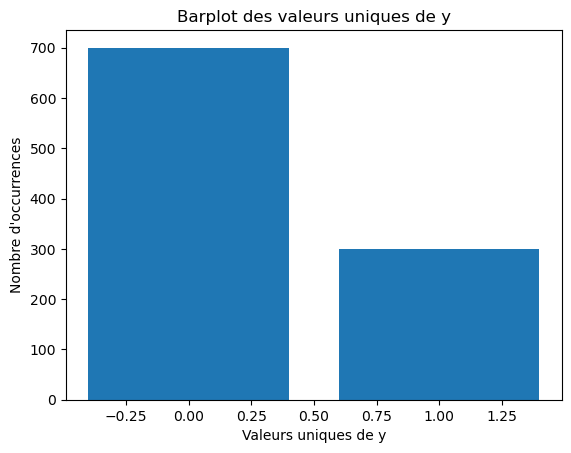

In [8]:
# D'aprés le graphe on remarque que notre dataset est désiquilibré, ce qui implique l'utlisation des valeurs de la matrice de confusion pour intepréter nos résultats car dans ce cas
# le rapport de bonnes prédicition ne suffit pas

counts = y.value_counts()

# Tracer le barplot
plt.bar(counts.index, counts.values)

# Ajouter des étiquettes et un titre
plt.xlabel('Valeurs uniques de y')
plt.ylabel('Nombre d\'occurrences')
plt.title('Barplot des valeurs uniques de y')

# Afficher le graphique
plt.show()

## 2.1 Etude des variables quantitatives

In [9]:
variables_quantitatives.head(5)

,Durée en mois,Montant du crédit,"Taux de versement en, pourcentage du revenu disponible",Résidence actuelle depuis,Age en années,Nombre de crédits existants dans cette banque,Nombre de personnes à charge
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


In [10]:
# On verifie les valeurs manquates
print(variables_quantitatives.isnull().sum())

Durée en mois                                             0
Montant du crédit                                         0
Taux de versement en, pourcentage du revenu disponible    0
Résidence actuelle depuis                                 0
Age en années                                             0
Nombre de crédits existants dans cette banque             0
Nombre de personnes à charge                              0
dtype: int64


In [11]:
# Les statistiques sur les variables quantitatives
variables_quantitatives.describe()

,Durée en mois,Montant du crédit,"Taux de versement en, pourcentage du revenu disponible",Résidence actuelle depuis,Age en années,Nombre de crédits existants dans cette banque,Nombre de personnes à charge
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


[0.02149641 0.01514764 0.00973649 0.00815035 0.01215051 0.00862355
 0.00854222]


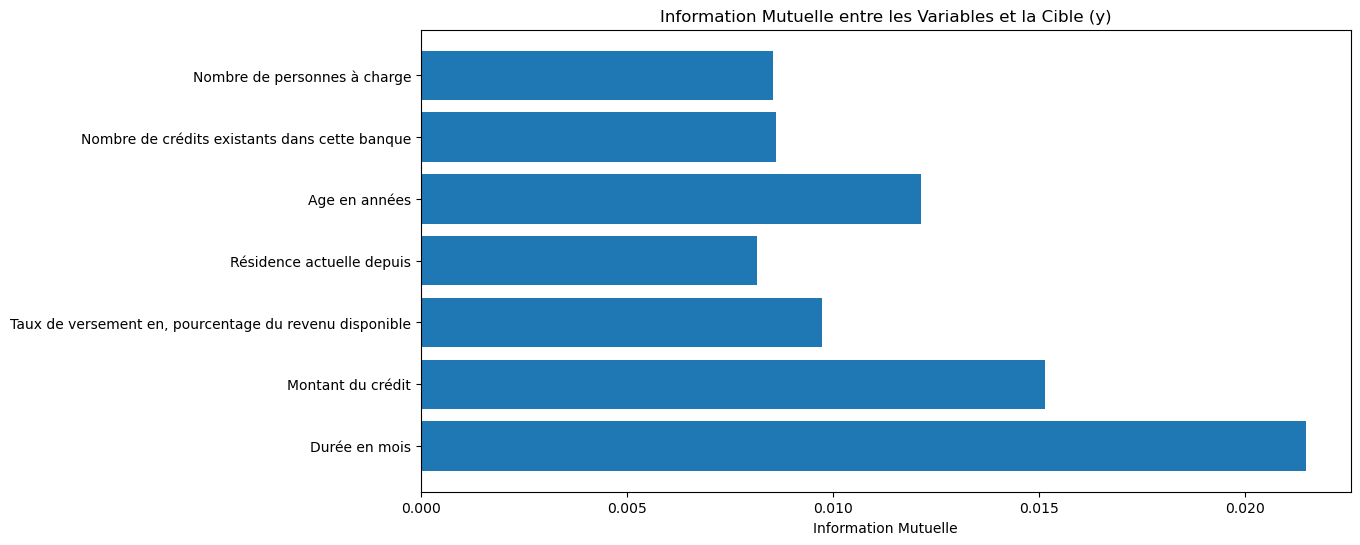

In [12]:
# Pour voir l'effet de chaque variable sur la cible y, on peut afficher les scores de  mutual information, qui est basée sur la notion de l'entropy entre chaque variables et la cible y

# Créer un dataframe avec les scores d'information mutuelle

nombre_iterations = 1000
mi_scores_array = np.ndarray((nombre_iterations,7))

# On calcule nombre_iterations=1000 fois les scores et on prend la moyenne
for i in range(nombre_iterations):
    mi_scores = mutual_info_regression(variables_quantitatives, y)
    mi_scores_array[i,:] = np.array(mi_scores)

average_mi_scores = np.mean(mi_scores_array, axis=0)
print(average_mi_scores)

mi_df = pd.DataFrame({'Variable': variables_quantitatives.columns, 'MI Score': average_mi_scores})

# Afficher un barplot des résultats
plt.figure(figsize=(12, 6))
plt.barh(mi_df['Variable'], mi_df['MI Score'])
plt.xlabel('Information Mutuelle')
plt.title('Information Mutuelle entre les Variables et la Cible (y)')
plt.show()

## Interprétation



Afin d'analyser l'ensemble de nos variables quantitatives, nous avons effectué les tests suivants :  

1.   Calcul du nombre de valeurs Null.
2.   Description des variables.
3.   Mesure de l'indépendence mutuelle entre chaque variable quantitative et la variable cible.





**1.**  D'abord, pour le 1er Test, nous remarquons qu'aucune variable ne contient des valeurs nulles. Ce qui semble a priori positif.

**2.**  De plus, d'après la description du 2ème test, nous constatons que :


*   Il y a 1000 observations dans l'échantillon.
*   En moyenne, les prêts ont une durée de 20.9 mois avec un montant de 3271.26 unités. Les emprunteurs consacrent en moyenne 2.97% de leur revenu disponible au remboursement. La population étudiée a en moyenne 1.41 crédit existant dans cette banque, avec une durée de résidence d'environ 2.85 ans et un âge moyen de 35.55 ans.
*    Les valeurs minimales, maximales et les quartiles fournissent des insights sur la variabilité et la distribution des données.


**3.**  **L'information mutuelle** est une mesure de la dépendance entre les variables, et une valeur élevée indique une relation forte et utile pour la prédiction. Dans notre cas, et pour chaque variable, ça signifie comme suit :

*   **Durée en mois :**Une varibale importante pour déterminer si un client est considéré comme "bon" ou "mauvais". Il se peut que la durée du crédit soit liée à la stabilité financière du client.

*   **Montant du crédit :** Une valeur d'IM significative montrant que le montant du crédit accordé a une certaine influence sur la catégorisation du client.

*   **Taux de versement en pourcentage du revenu disponible :** Bien que moins influente, cette variable contribue toujours à la prédiction de la qualité du client. Cela pourrait signifier que le taux de versement par rapport au revenu disponible peut influencer la fiabilité du client.

*   **Résidence actuelle depuis :** Cette variable a la plus faible IM ce qui indique que la durée de résidence actuelle est moins cruciale pour prédire si un client est "bon" ou "mauvais".

*   **Age en années :** Une valeur d'IM élevée et bien considérable qui montre que l'âge est un facteur important dans la catégorisation du client. Il se peut que des clients plus jeunes ou plus âgés présentent différents niveaux de risque.

*   **Nombre de crédits existants dans cette banque :** Avec une information mutuelle relativement faible, cette variable contribue moins à la prédiction de la qualité du client. Le nombre de crédits existants dans cette banque peut ne pas être un indicateur fort de la fiabilité du client.

*   **Nombre de personnes à charge :** une IM modérée, suggérant qu'elle a une certaine influence sur la catégorisation du client en "bon" ou "mauvais", bien que moins que d'autres variables.

D'aprés les résultats, toutes les varaiables quantitative ont une relation statistique  signficative avec la cible y, par conséquent la selection de variable n'est pas nécessaire.

## 2.2Etude des variables qualitatives

In [13]:
variables_qualitatives.head(5)

,Statut du compte courant existant,Historique de crédit,Objectif,Compte d'épargne,Emploi actuel depuis,Statut personnel et sexe,Autres débiteurs,Propriété,Autres plans de versement,Logement,Travail,Téléphone,Travailleur étranger
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [14]:
# On verifie les valeurs manquates
print(variables_qualitatives.isnull().sum())

Statut du compte courant existant    0
Historique de crédit                 0
Objectif                             0
Compte d'épargne                     0
Emploi actuel depuis                 0
Statut personnel et sexe             0
Autres débiteurs                     0
Propriété                            0
Autres plans de versement            0
Logement                             0
Travail                              0
Téléphone                            0
Travailleur étranger                 0
dtype: int64


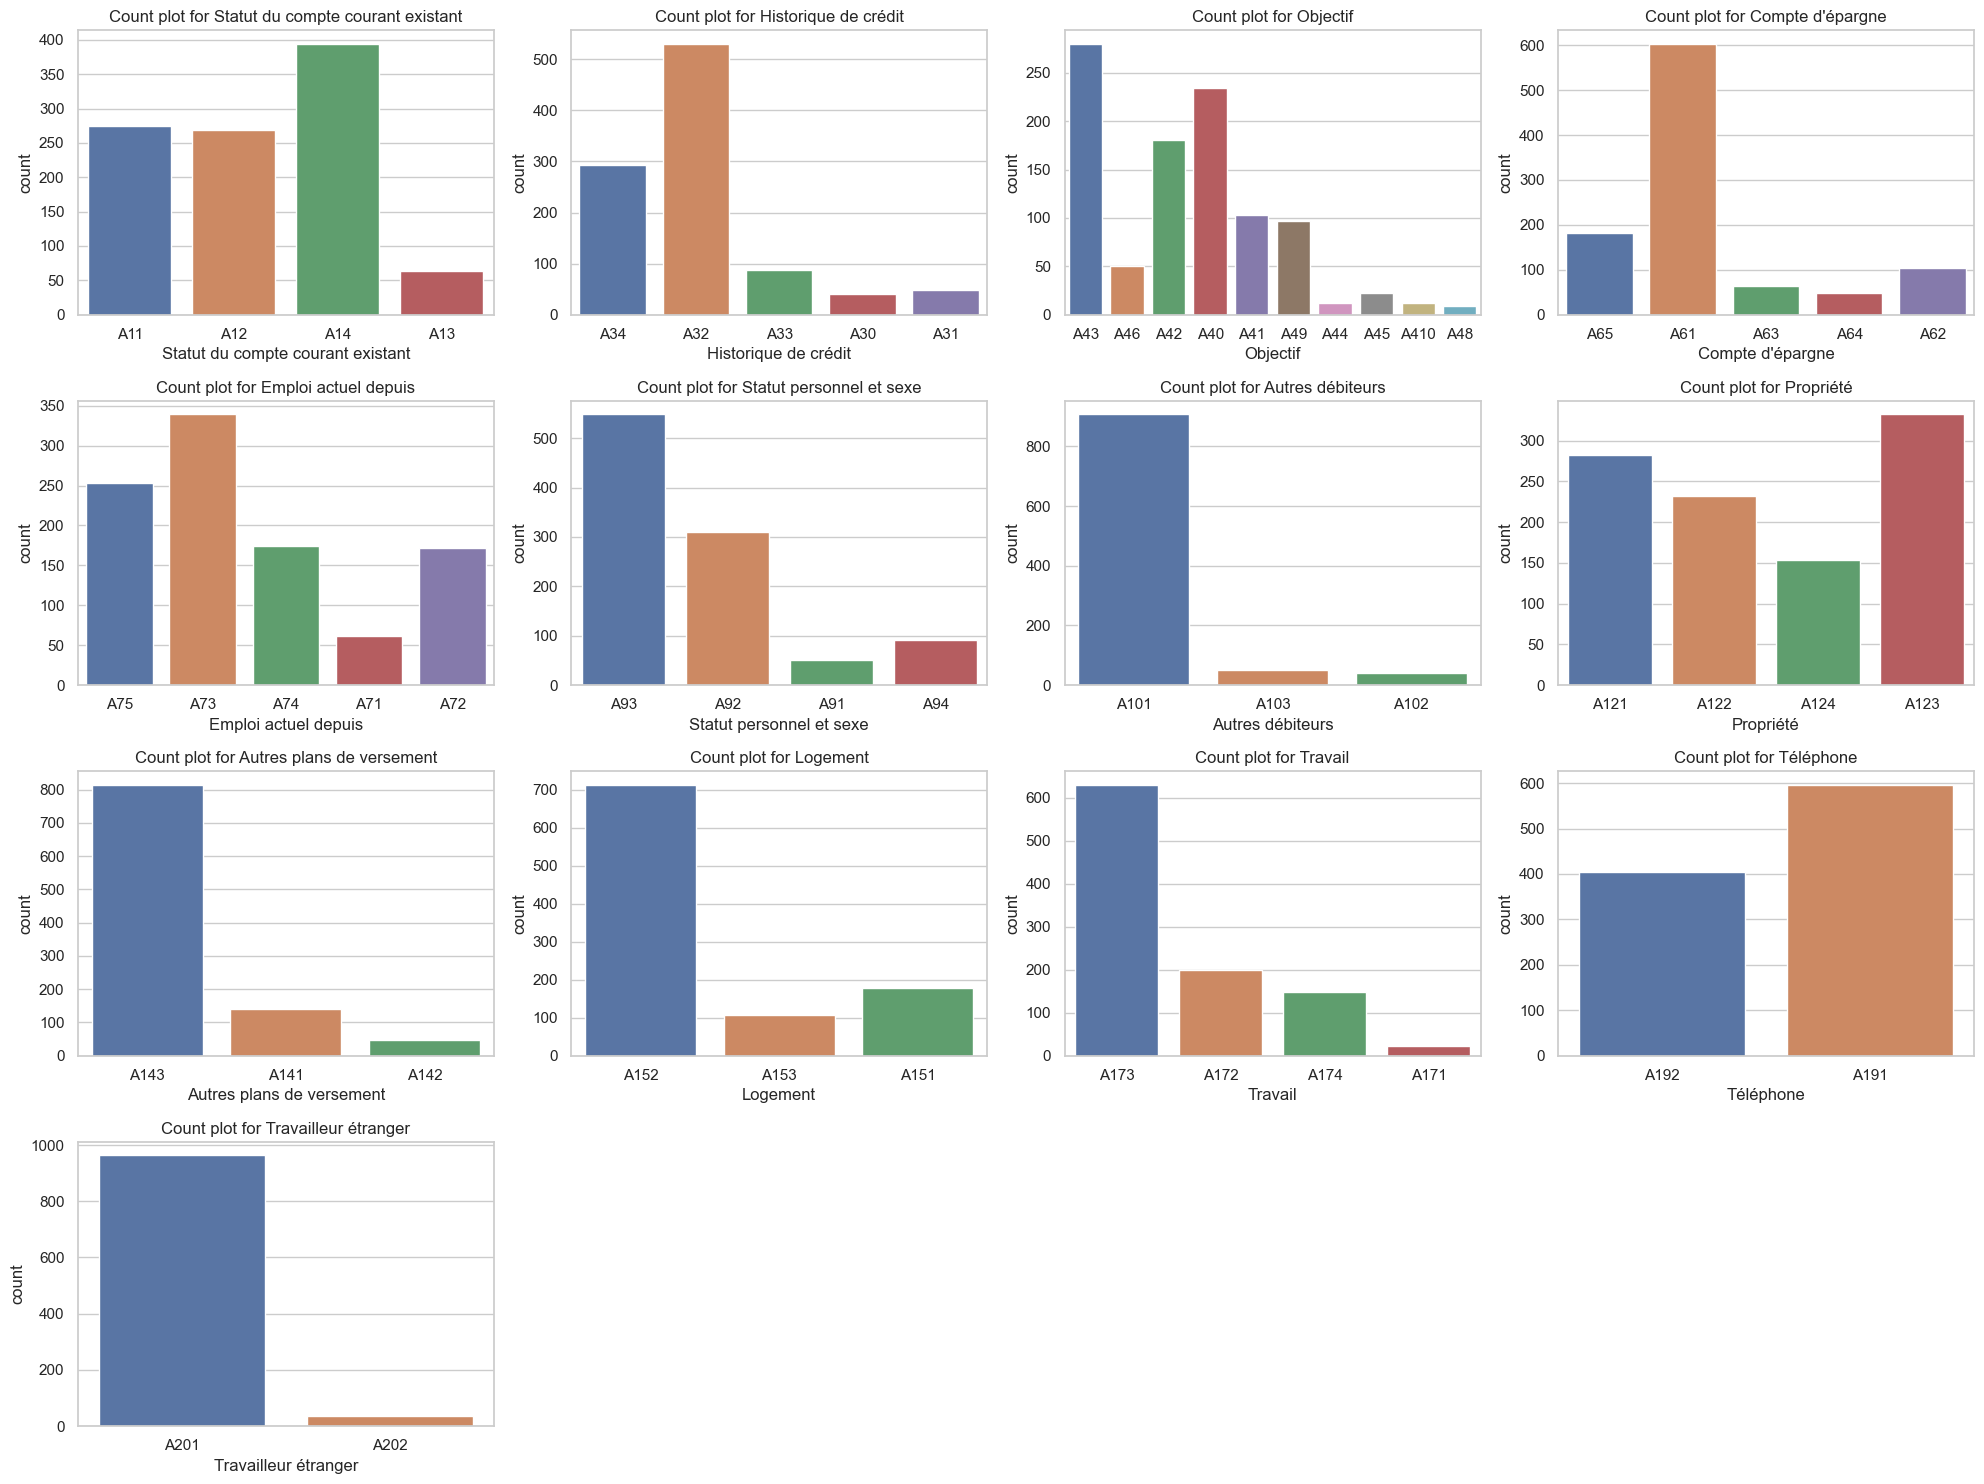

In [15]:
# On affiche les classes de chaque variable qualitative sous forme d'un count plot.
# On peut remarquer que la majorité des variables ont des valeurs déiquilibrées.
# Cet affichage pourra nous aider dans l'intèrprétation des résultats des différents algorithmes

# Configurer le style des graphiques
sns.set(style="whitegrid")

# Créer des barplots pour chaque valeur des variables qualitatives
plt.figure(figsize=(20, 15))

for i, col in enumerate(variables_qualitatives.columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, data=dataset)
    plt.title(f'Count plot for {col}')

plt.tight_layout()
plt.show()

[0.06439252 0.02892416 0.00686812 0.00911247 0.00954509 0.00725153
 0.00650896 0.01051258 0.00855859 0.01069302 0.00469986 0.00540682
 0.00780153]


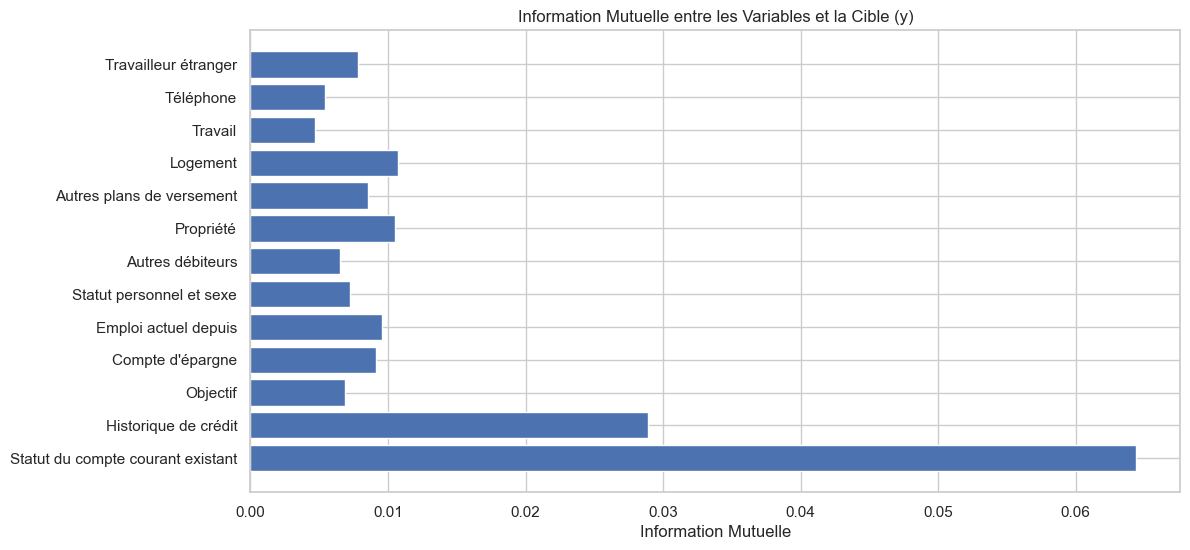

In [16]:
# Pour voir l'effet de chaque variable sur la cible y, on peut afficher les scores de  mutual information, qui est basée sur la notion de l'entropy entre chaque variable et la cible y

# Encodage des variables qualitatives
X = variables_qualitatives.copy()
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# On calcule 1000 fois les scores et on prend la moyenne
nombre_iterations = 1000
mutual_info_values = np.ndarray((nombre_iterations,13))
for i in range(nombre_iterations):
    mi_scores = mutual_info_classif(X, y)
    mutual_info_values[i,:] = np.array(mi_scores)

average_mutual_info = np.mean(mutual_info_values, axis=0)

# Créer un dataframe avec les scores d'information mutuelle
mi_df = pd.DataFrame({'Variable': variables_qualitatives.columns, 'MI Score': average_mutual_info})
print(average_mutual_info)
# Afficher un barplot des résultats
plt.figure(figsize=(12, 6))
plt.barh(mi_df['Variable'], mi_df['MI Score'])
plt.xlabel('Information Mutuelle')
plt.title('Information Mutuelle entre les Variables et la Cible (y)')
plt.show()



### Intèprétation

Afin d'analyser l'ensemble de nos variables qualitatives, nous avons effectué les tests suivants :  

1.   Calcul du nombre de valeurs Null.
2.   Affichage des catégories de chaque variable qualitative sous forme d'un count plot.
3.   Mesure de l'indépendence mutuelle entre chaque variable qualitative et la variable cible.





**1.**  D'abord, pour le 1er Test, nous remarquons qu'aucune variable qualitative ne contient des valeurs nulles. Ce qui semble a priori positif.


**2.**  Ensuite, pour le 2eme Test, nous remarquons que :

*   Presque toutes les variables qualitatives ont un déséquilibre dans leur nombre de catégories (imbalance).

*   Les variables [**"Travailleur étranger"** , **"Travail"** , **"Logement"** , **"Autres plans de versement"** , **"Autres débiteurs"**, **"Statut personnel et sexe"** , **"Compte d'épargne"** , **"Historique"** ] ont un déséquilibre intense de valeurs.

*   Le reste des variables sont plus équilibrés en termes de catégories que les variables passées.

**3.**  Enfin, pour le 3eme Test, et d'après les mesures d'information mutuelle notées pour chaque variable qualitative, nous observons comme suit :



*   **Statut du compte courant existant :** Une information mutuelle (IM) élevée ce qui indique que le type de compte courant peut fortement influencer la probabilité qu'un client soit considéré comme "bon" ou "mauvais".

*   **Historique de crédit :** Avec une information mutuelle significative, l'historique de crédit est une variable importante. Cela confirme que les antécédents de crédit du client jouent un rôle essentiel dans la détermination de sa qualité.

*  **Objectif :** Une information mutuelle relativement basse suggère que l'objectif peut avoir moins d'impact sur la catégorisation du client que les variables précédentes. Cela indique que d'autres variables peuvent être plus pertinentes pour prédire la qualité du client.

*   **Compte d'épargne :** Bien que la valeur soit relativement faible, le compte d'épargne contribue toujours à la prédiction de la qualité du client.

*   **Emploi actuel depuis :** Cette variable a une information mutuelle considérable, indiquant que la stabilité de l'emploi peut influencer la catégorisation du client en "bon" ou "mauvais".

*   **Statut personnel et sexe :** Une faible valeur suggèrant que le statut personnel et le sexe ne contribuent pas vraiment dans la catégorisation du client.

*   **Autres débiteurs :** Avec une IM relativement basse, la présence d'autres débiteurs semble moins cruciale pour la prédiction de la qualité du client.

*   **Propriété :** avec une IM élevée est une variable importante. La nature de la propriété du client peut être un indicateur significatif de sa fiabilité.

*   **Autres plans de versement :** Bien que la valeur soit relativement basse, cette variable contribue à la prédiction de la qualité du client. Il peut y avoir des différences dans les plans de versement en fonction de la qualité du client.

*   **Logement :** Une IM considérable, donc le type de logement peut jouer un rôle important dans la détermination de la qualité du client.

*   **Travail :** Selon sa faible IM, La variable Travail peut avoir moins d'influence sur la catégorisation du client.

*   **Téléphone :** Une IM relativement basse suggère que la présence d'un téléphone a une influence moins significative sur la qualité du client.

*   **Travailleur étranger :** IM relativement basse, le statut de travailleur étranger a une influence modérée sur la catégorisation du client.

D'aprés les résultats, toutes les varaiables qualtitaives ont une relation statistique  signficative avec la cible y, par conséquent la selection de variable n'est pas nécessaire.

# 3 Application des différents algorithmes et affichage du tableau comparatif

Afin de réaliser l'objectif de notre projet, nous avons implémenté les techniques d'apprentissage supervisé suivantes :

*   **Régression Logistique :** Algorithme de classification binaire supervisée modélisant la probabilité d'appartenance d'une instance à une classe donnée. Il utilise une fonction logistique pour mapper des combinaisons linéaires des caractéristiques d'entrée en probabilités. Nous croyons que le choix de ce modèle s'adapte parfaitement à notre besoin de catégorisation binaire du client.

*   **K-Nearest Neighbors (KNN) :** basé sur les instances où un point de données est classifié en fonction de la classe majoritaire de ses k voisins les plus proches. Le choix de 'k' détermine le niveau de lissage local des frontières de décision. Pour notre cas, nous avons défini k=3.


*   **Decision Tree :** Modèle hiérarchique en forme d'arbre où chaque nœud interne représente une décision basée sur une caractéristique, et chaque nœud feuille représente le résultat. Il divise récursivement le jeu de données pour créer un arbre qui prédit la variable cible (qualité du client).

*   **Random Forest :** Méthode d'ensemble qui construit plusieurs arbres de décision et combine leurs prédictions. Chaque arbre est formé sur un sous-ensemble aléatoire de caractéristiques et d'instances, réduisant le surajustement et améliorant la précision.

*   **Gradient Boosting :** Technique d'ensemble qui construit des arbres de décision séquentiellement, chaque arbre corrigeant les erreurs des précédents. Elle combine des apprenants faibles pour créer un modèle prédictif puissant.

*   **AdaBoost :** Algorithme de renforcement adaptatif qui combine plusieurs classificateurs faibles pour former un modèle robuste. Il attribue des poids aux instances mal classées, se concentrant sur leur amélioration lors des itérations suivantes.

*   **Naive Bayes Gaussien :** Algorithme de classification probabiliste basé sur le théorème de Bayes. Il suppose l'indépendance conditionnelle des caractéristiques donné la classe, simplifiant les calculs. Souvent utilisé pour la classification de texte et le filtrage de spam.

*   **Linear Discriminant Analysis (LDA) :** Technique de réduction de dimension et de classification. Elle trouve des combinaisons linéaires de caractéristiques qui séparent au mieux les classes tout en préservant la variance au sein de chaque classe.

*   **Quadratic Discriminant Analysis (QDA) :** Similaire à LDA, mais sans supposer une covariance égale entre les classes. Elle offre plus de flexibilité en considérant des variances différentes pour chaque classe.

*   **Linear SVM :** Algorithme de classification linéaire qui trouve l'hyperplan qui sépare au mieux les classes tout en maximisant la marge. Il vise à minimiser les erreurs de classification et à généraliser bien aux nouvelles données.

*   **Non-Linear SVM :** SVM étendu pour traiter des relations non linéaires en utilisant une astuce de noyau pour mapper les caractéristiques d'entrée dans un espace de dimensions supérieures. Il trouve un hyperplan dans cet espace pour séparer efficacement les classes.

In [17]:
# Dans cette partie on applique les différents algorithmes de classification
# Pour chaque algorithme on a décidé soit d'appliquer les données mixtes, soit les données quantitatives uniquement.
# Pour faire cela il suffit de changer à coté de chaque algorithme soit "all" pour les données mixtes soit "num" pour les données numériqes seulement
# Ces paramètres ont été choisis après plusieurs exécutions

# On définit X comme suit
X = dataset.copy()

# Diviser les données en ensemble d'entraînement et ensemble de test de taille 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer des transformers pour les variables quantitatives et qualitatives
numeric_features = variables_quantitatives.columns
categorical_features = variables_qualitatives.columns
#                Les données d'entrainement
##########################################################################
X_num  = X_train[numeric_features].copy()
scaler = StandardScaler()
X_num  = pd.DataFrame(scaler.fit_transform(X_num),columns=numeric_features)
X_cat = X_train[categorical_features].copy()
encoder = OneHotEncoder()    # On utlise le one hot encoder
X_cat = encoder.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat, columns=encoder.get_feature_names_out(categorical_features))
scaler = StandardScaler()
X_cat = pd.DataFrame(scaler.fit_transform(X_cat),columns=X_cat.columns)
X_mixte = pd.concat([X_num,X_cat],axis=1)
datasets = { "all" : X_mixte.values, "num" : X_num.values}

#                  Les données de test
#########################################################################
X_num_test = X_test[numeric_features].copy()
scaler_test = StandardScaler()
X_num_test = pd.DataFrame(scaler_test.fit_transform(X_num_test), columns=numeric_features)

X_cat_test = X_test[categorical_features].copy()
X_cat_test = encoder.transform(X_cat_test).toarray()
X_cat_test = pd.DataFrame(X_cat_test, columns=encoder.get_feature_names_out(categorical_features))
scaler = StandardScaler()
X_cat_test = pd.DataFrame(scaler.fit_transform(X_cat_test),columns=X_cat_test.columns)
X_mixte_test = pd.concat([X_num_test, X_cat_test], axis=1)
datasets_test = {"all": X_mixte_test.values, "num": X_num_test.values}
##########################################################################
# Créer un dataframe pour stocker les résultats
performance_df = {}

# Modèles, pour chaque modèle : "all" signifie données mixtes (quantitatives et qualitatives)
#                               "num" signifie données numérique seulement
models = [
    ('Logistic Regression', LogisticRegression(random_state=42), 'all'),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3), 'all'),
    ('Decision Tree', DecisionTreeClassifier(max_depth=7,random_state=42), 'all'),
    ('Random Forest', RandomForestClassifier(n_estimators=1,random_state=42), 'all'),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42), 'all'),
    ('AdaBoost', AdaBoostClassifier(random_state=42), 'all'),
    ('Gaussian Naive Bayes', GaussianNB(), 'all'),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis(), 'all'),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis(), 'num'),
    ('Linear SVM', SVC(kernel='linear',random_state=42), 'all'),
    ('Non-Linear SVM', SVC(kernel="rbf",random_state=42), 'all')
]

# Boucle sur les modèles
for model_name, model, feature_type in models:

    # Entraîner le modèle sur l'ensemble d'entraînement
    X_used = datasets[feature_type]
    model.fit(X_used, y_train)
    y_train_pred = model.predict(X_used)
    X_test_used = datasets_test[feature_type]
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_used)

    # Mesures de performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy1 = accuracy_score(y_train, y_train_pred)
    precision1 = precision_score(y_train, y_train_pred)
    recall1 = recall_score(y_train, y_train_pred)
    f11 = f1_score(y_train, y_train_pred)
    # Stocker les résultats dans le dataframe
    performance_df[model_name]={
         'Accuracy_train': accuracy1,
        'Precision_train': precision1,
        'Recall_train': recall1,
        'F1 Score_train': f11,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Afficher le dataframe comparatif de performances
performance_df = pd.DataFrame(performance_df)
# Fonction pour colorer la cellule avec la valeur la plus élevée dans chaque ligne
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

def highlight_mean(s):
    is_mean = s == s.median()
    return ['background-color: yellow' if v else '' for v in is_mean]

performance_df = performance_df.style.apply(highlight_max, axis=1).apply(highlight_min, axis=1).apply(highlight_mean, axis=1)

performance_df
# On affiche le résultat pour chaque modèle, les performances sont measurées sur le dataset d'entrainement et du test
# Les cases vertes représentent le modèle qui a obtenu le score le plus haut selon la mesure  correspondante

,Logistic Regression,K-Nearest Neighbors,Decision Tree,Random Forest,Gradient Boosting,AdaBoost,Gaussian Naive Bayes,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Linear SVM,Non-Linear SVM
Accuracy_train,0.775000,0.833750,0.866250,0.871250,0.915000,0.796250,0.737500,0.782500,0.716250,0.785000,0.896250
Precision_train,0.664865,0.781250,0.889535,0.773810,0.948187,0.698980,0.547988,0.671795,0.559322,0.686486,0.938889
Recall_train,0.510373,0.622407,0.634855,0.809129,0.759336,0.568465,0.734440,0.543568,0.273859,0.526971,0.701245
F1 Score_train,0.577465,0.692841,0.740920,0.791075,0.843318,0.627002,0.627660,0.600917,0.367688,0.596244,0.802850
Accuracy,0.810000,0.715000,0.725000,0.685000,0.805000,0.815000,0.725000,0.800000,0.685000,0.780000,0.790000
Precision,0.733333,0.521739,0.555556,0.469697,0.708333,0.711538,0.524390,0.702128,0.428571,0.653061,0.757576
Recall,0.559322,0.406780,0.338983,0.525424,0.576271,0.627119,0.728814,0.559322,0.203390,0.542373,0.423729
F1 Score,0.634615,0.457143,0.421053,0.496000,0.635514,0.666667,0.609929,0.622642,0.275862,0.592593,0.543478


# Tests et Résultats

## **Démarche de Tests**

Afin de bien interpréter les résultats, nous avons visualisé le tableau comparatif ci-dessous en mesurant la performance d'entrainement (Accuracy_train, Precision_train, Recall_train,F1 Score_train) et de test (Accuracy, Precision, Recall,F1 Score) de chaque modèle implémenté.

Dans le but de bien comprendre le comportement et la robustesse de chaque modèle, nous  indiquons dans notre tableau des indicateurs statistiques de comparaison où :     
*    La couleur verte indique une valeur maximale de la mesure de performance.
*    La couleur rouge indique une valeur minimale.
*    La couleur jaune indique la valeur médiane.

## **Observations, Analyse et Interprétation**

### **Observation 1 : Quadratic Discriminant Analysis (QDA)**

**Le modèle Quadratic Discriminant Analysis (QDA)** affiche les performances les plus faibles et les plus médiocres (pour toutes les mesures de performance) à la fois dans les ensembles d'apprentissage et de test, ce qui signifie qu'il fait un grand nombre de prédictions faussement positives et faussement négatives, et qu'il a donc du mal à capturer les instances pertinentes dans les données. Nous analysons ceci comme suit :

  *   **Overfitting :** Le modèle QDA est nettement plus performant sur les données sur lesquelles il a été formé que sur les nouvelles données non vues. Cela suggère que le modèle QDA pourrait être surajusté par rapport aux données d'apprentissage.

  *   **Faible rappel (Recall) :** Le modèle a du mal à identifier une grande partie des instances positives.

  *   **Sensibilité des données :** La méthode QDA est appliquée uniquement aux données numériques (num). Ce choix peut avoir un impact sur ses performances par rapport aux autres modèles qui utilisent des données mixtes.

### **Observation 2 : Gradient Boosting**


**L'algorithme Gradient Boosting**  montre des valeurs de performance maximales pour l'ensemble d'apprentissage, et des résultats très significatifs sur l'ensemble de test également. Nous concluons sur les points suivants :

  *   **Généralisation :** Le Gradient Boosting démontre une excellente généralisation de l'ensemble de formation à l'ensemble de test, avec une précision élevée maintenue.

  *   **Compromis précision-recall :** bien que la précision soit légèrement inférieure sur l'ensemble de test par rapport à l'ensemble de formation, le compromis est raisonnable, ce qui indique que le modèle est bien équilibré.

  *   **Rappel (Recall) :** Le modèle maintient un rappel relativement élevé sur l'ensemble de test, capturant une partie substantielle des instances positives.

  *   **Robustesse :** Le Gradient Boosting présente des performances constantes à travers plusieurs métriques, ce qui suggère sa robustesse et son adéquation à la tâche donnée.


### **Observation 3 : AdaBoost**


  Nous remarquons que **le modèle AdaBoost** a une valeur médiane de l'accuracy (0,796250) et de précision (0,698980) par rapport aux autres modèles. D'autre part, AdaBoost présente la meilleure et la maximale accuracy de test (0,815000) et le score F (0,666667) par rapport aux autres modèles. D'après ces résultats, nous observons clairement les points suivants :

  *   **Généralisation :** AdaBoost présente une précision et un recall équilibrés, ce qui démontre une bonne généralisation de l'ensemble d'apprentissage à l'ensemble de test, avec une accuracy élevée maintenue.

  *   **Équilibre entre la précision et le rappel :** Les valeurs de précision et de rappel sur l'ensemble de test sont bien équilibrées, indiquant un modèle bien ajusté.

  *   **Robustesse :** AdaBoost se comporte de manière cohérente sur plusieurs métriques, suggérant sa pertinence pour la tâche donnée.

  *   **Force de l'ensemble :** AdaBoost est un modèle d'ensemble qui combine plusieurs apprentissages faibles pour créer un apprenant fort. L'impact positif de la combinaison de plusieurs apprenants faibles sur notre ensemble de données est évident dans ses performances.

### **Observation 4 : Linear SVM**

En ce qui concerne le modèle **SVM linéaire**, nous constatons une bonne accuracy, une bonne précision et un bon rappel sur les ensembles d'apprentissage et de test. Nous remarquons également que les mesures de performance de l'ensemble de test sont la médiane par rapport aux autres modèles, ce qui montre que le modèle est beaucoup plus équilibré par rapport au comportement d'autres modèles implémentés. De plus , notre Linear SVM ne présente aucun signe de surajustement et fonctionne bien avec des données mixtes. Nous constatons les conclusions suivantes :

  *   **Généralisation :** Les SVM linéaires démontrent une bonne généralisation de l'ensemble d'apprentissage à l'ensemble de test, avec une légère diminution de la justesse.
  *   **Équilibre entre précision et rappel :** Les valeurs de précision et de rappel sur l'ensemble de test sont relativement équilibrées, ce qui indique un compromis raisonnable entre la prédiction correcte d'instances positives et l'évitement des faux positifs. Ceci suggère qu'ils font des prédictions raisonnables pour les instances positives et négatives.
  *   **Limite de décision linéaire :** le SVM linéaire crée une limite de décision qui sépare les classes de manière linéaire. Le modèle suppose que les classes peuvent être séparées par un hyperplan dans l'espace des caractéristiques.
  *   **Robustesse face aux valeurs aberrantes :** Les SVM, y compris les SVM linéaires, peuvent être sensibles aux valeurs aberrantes car ils visent à trouver une limite de décision qui maximise la marge entre les classes.

### **Observation 5 : K-Nearest Neighbors, Random Forest, Non-Linear SVM, Decision Tree**

Les modèles **K-Nearest Neighbors (KNN)**, **Random Forest**, **Decision Tree** et **Non-Linear SVM** les modèles subissent un ***`surajustement important (overfitting)`***.


Pour le modèle **K-Nearest Neighbors (KNN)**, nous observons une grande accuracy sur l'ensemble d'apprentissage (83,38 %) mais une baisse modérée sur l'ensemble de test (71,50 %), ce qui suggère un surajustement potentiel (overfitting). Nous remarquons également que la précision et le rappel sont relativement équilibrés sur l'ensemble de test, ce qui indique un compromis raisonnable entre la prédiction correcte des instances positives et l'évitement des faux positifs.


D'autre part, pour **Random Forest**, nous remarquons que l'accuracy de l'ensemble d'apprentissage est relativement élevée (87,13 %), avec une valeur maximale du recall sur l'ensemble d'apprentissage (en vert) mais que la justesse de l'ensemble de test a considérablement baissé (68,5 %). Le modèle Random Forest peut être surajusté (overfitted), en particulier si le nombre d'arbres n'est pas correctement réglé. La nature d'ensemble des forêts aléatoires permet souvent d'atténuer l'overfitting, mais un réglage minutieux est toujours nécessaire.



De l'autre côté, Alors que les performances de l'ensemble d'apprentissage sont élevées (accuracy = 86.62%), pour le modèle **Decision Tree**, la baisse de l'accuracy sur l'ensemble de test (accuracy = 72.5%) indique un surajustement potentiel des données d'apprentissage.


Enfin, pour le modèle **Non-Linear SVM**, nous observons une grande accuracy sur l'ensemble d'apprentissage (89,63 %), mais celle sur l'ensemble de test est considérablement faible (79 %). Les SVM non linéaires, en particulier avec des noyaux complexes sur des échantillons de données de moins complexité, peuvent être sujets à un surajustement s'ils ne sont pas correctement régularisés.


De ce fait, afin de réduire le overfitting, nous énumérons les considérations communes entre ces 4 modèles suivantes :

  *   **Complexité du modèle :** Le KNN, le SVM non linéaire, et le Decision Tree peuvent être sensibles au choix des hyperparamètres qui contrôlent la complexité du modèle. Random Forests, d'un autre côté, est constitué d'un ensemble d'arbres de décision qui, individuellement, peuvent être profonds et complexes. La nature de l'ensemble permet d'atténuer le surajustement, mais la profondeur des arbres individuels est un élément important à prendre en compte.

  *   **Réglage des hyperparamètres :** Pour les quatre modèles, l'ajustement des hyperparamètres est crucial pour trouver le bon équilibre entre l'underfitting et l'overfitting. Cela inclut la profondeur maximale des arbres pour le Decision Tree, le nombre de voisins pour le KNN, la régularisation pour le SVM non linéaire, et divers paramètres pour les Random Forests.

  *   **Échelle des données :** Le KNN est sensible à l'échelle des caractéristiques, d'où l'importance de la mise à l'échelle des caractéristiques. Les forêts aléatoires sont moins sensibles à la mise à l'échelle des caractéristiques, mais il s'agit toujours d'une bonne pratique. Les SVM non linéaires, en particulier avec certains noyaux, peuvent nécessiter une mise à l'échelle des caractéristiques. Pour le Decision Tree, la mise à l'échelle n'est généralement pas nécessaire, car la division des données se fait selon des seuils sur les caractéristiques, plutôt que sur les valeurs brutes.

  *   **Sensibilité à l'overfitting :** Les quatre modèles peuvent montrer des signes d'overfitting, en particulier lorsque la complexité du modèle n'est pas correctement contrôlée. Pour le Decision Tree, la profondeur maximale doit être ajustée de manière appropriée pour éviter le surajustement.

### **Observation 6 : Gaussian Naive Bayes**

Gaussian Naive Bayes affiche des performances décentes sur les ensembles d'apprentissage et de test, offrant un équilibre entre la précision et le rappel. Son efficacité sur les petits ensembles de données et sa robustesse aux caractéristiques non pertinentes en font un choix précieux dans ce scénario. Nous notons les points suivants :     

  *   **Généralisation décente :** Le modèle se généralise moyennement bien de l'ensemble d'apprentissage à l'ensemble de test, avec une légère baisse des performances.

  *   **Équilibre entre précision et rappel :** Le modèle atteint un équilibre raisonnable entre la précision et le rappel sur les ensembles d'apprentissage et de test. Aussi, le score F1 fournit une mesure d'évaluation équilibrée, prenant en compte à la fois les faux positifs et les faux négatifs.

  *   **Efficacité sur les petits ensembles de données :** Gaussian Naive Bayes est connu pour son efficacité sur les petits ensembles de données, ce qui le rend adapté à notre cas avec des données limitées de 1000 points de données seulement.

  *   **Robustesse face aux caractéristiques non pertinentes :**
La méthode GNB est robuste aux caractéristiques non pertinentes en raison de l'hypothèse d'indépendance des caractéristiques, ce qui est précieux dans notre situation.

### **Observation 7 : Logistic Regression, Liner Discriminent Analysis (LDA)**

Dans cette cellule, nous énumérons les observations et les considérations communes entre ces 2 modèles :

 **Logistic Regression :**

La régression logistique présente une bonne généralisation, avec une accuracy relativement élevée sur l'ensemble de test (81%) par rapport à l'ensemble d'apprentissage. Nous remarquons également une précision et un rappel équilibrés, qui atteignent un équilibre raisonnable entre la précision et le rappel à la fois sur les ensembles d'apprentissage et de test. De même, le score F1 fournit une mesure d'évaluation équilibrée, prenant en compte à la fois les faux positifs et les faux négatifs. Et en termes d'interprétabilité, La régression logistique fournit des coefficients interprétables, permettant de comprendre l'impact de chaque caractéristique sur le logarithme de la variable réponse.

  **Linear Discriminenet Analysis (LDA) :**

Nous constatons des performances similaires à celles de la régression logistique. En d'autres termes, l'analyse discriminante linéaire (LDA) présente des performances similaires à celles de la régression logistique, avec une exactitude, une précision, un rappel et un score F1 comparables.

  **Considérarions communes :**

* **Performance et généralisation du modèle :** La régression logistique et l'analyse discriminante linéaire (LDA) démontrent toutes deux une bonne généralisation de l'ensemble d'apprentissage à l'ensemble de test, comme le montrent leurs scores de justesse élevés respectifs. Cela indique que les deux modèles ont capturé les modèles sous-jacents dans les données et sont capables de faire des prédictions raisonnables sur des cas non vus.

* **Précision et rappel équilibrés :** Dans les deux modèles, il existe un compromis équilibré entre la précision et le rappel. Cet équilibre se reflète dans le score F1, qui fournit une mesure complète des performances du modèle prenant en compte à la fois les faux positifs et les faux négatifs. Les deux modèles atteignent un équilibre raisonnable, ce qui suggère qu'ils sont bien adaptés à notre tâche de classification binaire.

* **Similitude des performances des ensembles d'entraînement et de test :** Les deux modèles présentent des performances relativement cohérentes entre les ensembles de formation et de test. Les différences mineures observées indiquent un ajustement bien équilibré, suggérant qu'aucun modèle n'est significativement surajusté ou sous-ajusté par rapport aux données.

* **Applicabilité à la classification binaire :** La régression logistique et la LDA sont toutes deux bien adaptées aux tâches de classification binaire, comme le montrent leurs mesures de performance. Elles distinguent efficacement deux classes, ce qui en fait des choix appropriés lorsqu'il s'agit de variables de résultats binaires.


# Deuxième partie : Données relationnelles

# 1 - Récupération de donnés

In [18]:
from scipy.io import loadmat

# Charger le fichier .mat
mat_data = loadmat('Donnees_relationnelles/cora.mat')
# Récupérer les matrices W,X et classes
W_matrix = mat_data["W"]
X_matrix = mat_data["fea"]
classes = mat_data["gnd"]
X_matrix.shape,X_matrix.shape ,classes.shape

((2708, 1433), (2708, 1433), (2708, 1))

## 2 - Comparaison des méthodes en utlisant  la matrice X seulement

In [19]:
# Dans cette partie on applique les différents algorithmes de classification sur la matrice X uniquement


# On définit X comme suit
X = X_matrix.copy()
classes = classes.ravel()
# Diviser les données en ensemble d'entraînement et ensemble de test de taille 20%
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size=0.2, random_state=42)

# Créer un dataframe pour stocker les résultats
performance_df = {}

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(max_depth=45,random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=10,random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis(reg_param=1e-6)),
    ('Linear SVM', SVC(kernel='linear',random_state=42)),
    ('Non-Linear SVM', SVC(kernel="rbf",random_state=42))
]

# Boucle sur les modèles
for model_name, model in models:

    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Mesures de performance sur le dataset de  test
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')
    # Mesures de performance sur le dataset d'entrainement
    accuracy1 = accuracy_score(y_train, y_train_pred)
    precision1 = precision_score(y_train, y_train_pred,average='micro')
    recall1 = recall_score(y_train, y_train_pred,average='micro')
    f11 = f1_score(y_train, y_train_pred,average='micro')
    # Stocker les résultats dans le dataframe
    performance_df[model_name]={
        'Accuracy_train': accuracy1,
        'Precision_train': precision1,
        'Recall_train': recall1,
        'F1 Score_train': f11,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Afficher le dataframe comparatives de performances
performance_df = pd.DataFrame(performance_df)
# Fonction pour colorer la cellule avec la valeur la plus élevée dans chaque ligne
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

# Fonction pour colorer la cellule avec la valeur la plus basse dans chaque ligne
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

# Fonction pour colorer la cellule avec la valeur médiane dans chaque ligne
def highlight_mean(s):
    is_mean = s == s.median()
    return ['background-color: yellow' if v else '' for v in is_mean]

performance_df = performance_df.style.apply(highlight_max, axis=1).apply(highlight_min, axis=1).apply(highlight_mean, axis=1)

performance_df
# On affiche le résultat pour chaque modèle, les performances sont measuré sur le dataset d'entrainement et du test
# Les cases vertes représentent le modèle qui a obtenu le score le plus haut selon la measure  correspondante

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Logistic Regression,K-Nearest Neighbors,Decision Tree,Random Forest,Gradient Boosting,AdaBoost,Gaussian Naive Bayes,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Linear SVM,Non-Linear SVM
Accuracy_train,0.991690,0.702216,0.947368,0.994460,0.941828,0.610803,0.804709,0.984303,0.899354,0.997692,0.963527
Precision_train,0.991690,0.702216,0.947368,0.994460,0.941828,0.610803,0.804709,0.984303,0.899354,0.997692,0.963527
Recall_train,0.991690,0.702216,0.947368,0.994460,0.941828,0.610803,0.804709,0.984303,0.899354,0.997692,0.963527
F1 Score_train,0.991690,0.702216,0.947368,0.994460,0.941828,0.610803,0.804709,0.984303,0.899354,0.997692,0.963527
Accuracy,0.761993,0.455720,0.660517,0.717712,0.754613,0.623616,0.503690,0.586716,0.147601,0.719557,0.752768
Precision,0.761993,0.455720,0.660517,0.717712,0.754613,0.623616,0.503690,0.586716,0.147601,0.719557,0.752768
Recall,0.761993,0.455720,0.660517,0.717712,0.754613,0.623616,0.503690,0.586716,0.147601,0.719557,0.752768
F1 Score,0.761993,0.455720,0.660517,0.717712,0.754613,0.623616,0.503690,0.586716,0.147601,0.719557,0.752768


# Interprétation

## **Analyse des performances sur les données relationnelles**

### **Modèles avec performances élevées sur les données d'entraînement :**

*   **Linear SVM :** Ce modèle a montré la meilleure performance d'entraînement avec une accuracy de (**99.77%**). Les SVM linéaires sont souvent efficaces pour les données linéaires, ce qui peut être le cas avec des données relationnelles.

*   **Random Forest et Decision Tree :** Ces modèles ont également montré des performances élevées sur les données d'entraînement. Les arbres de décision sont capables de capturer des relations complexes, et les forêts aléatoires étendent cette capacité en agrégeant plusieurs arbres. Ce qui s'adapte aux données relationnelles mesurant les relations complexes entre les variables.

### **Modèles avec performances modérées sur les données d'entraînement :**

*    **Logistic Regression**, **Linear Discriminant Analysis**, et **Gradient Boosting** : Bien que ces modèles n'aient pas atteint les performances les plus élevées sur les données d'entraînement, ils ont montré des résultats solides. La régression logistique est souvent utilisée pour les problèmes de classification, tandis que l'analyse discriminante linéaire peut être puissante pour des données relationnelles.

### **Modèles avec performances plus faibles sur les données d'entraînement :**

*    **Quadratic Discriminant Analysis**, **Gaussian Naive Bayes**, **K-Nearest Neighbors** : Ces modèles ont montré des performances inférieures sur les données d'entraînement, ce qui suggère qu'ils peuvent ne pas être aussi adaptés à la structure des données relationnelles.

*   **AdaBoost** : Bien que ce modèle ait obtenu la plus mauvaise performance d'entraînement  (**61%**), il est intéressant de noter qu'il a montré une précision de test supérieure à sa performance d'entraînement. Cela peut indiquer une capacité d'adaptation à de nouveaux exemples.

### **Performances de test par rapport à l'entraînement :**

*    **Baisse significative :** Il est commun d'observer une baisse de performance entre l'entraînement et les tests, mais il est crucial de minimiser cette disparité pour garantir la généralisation du modèle à de nouvelles données.

*    Meilleures performances sur les tests pour **Logistic Regression**, **Gradient Boosting** et **Non Linear SVM**: Ces modèles semblent mieux généraliser aux nouvelles données, ce qui est essentiel pour l'efficacité d'un modèle. Ils ont montré de meilleures performances par rapport à d'autres modèles avec une précision de (**76,16%**), (**75,46**) et (**75,27**) respectivement.

*    **AdaBoost :** Bien qu'il ait montré une mauvaise performance d'entraînement, il a une performance de test relativement meilleure, indiquant une capacité à généraliser malgré des performances d'entraînement plus faibles.

*    Les modèles **Linear SVM**, **Random Forest**, **et Decision Tree** ont montré de bonnes mesures de tests avec une précision de (**71,95%**), (**71,77%**) et (**66,05%**) respectivement.

*    **Linear Discriminant Analysis**, **Gaussian Naive Bayes**, **K-Nearest Neighbors**: Ces modèles ont montré des baisses de performances significatives sur les tests par rapport à l'entraînement avec une précision de (**58,67%**) (**50,36%**) et (**45,57%**) respectivement..

*    **Quadratic Discriminant Analysis :** Ce modèle a la plus mauvaise performance sur les tests (**16%**), soulignant une incapacité à généraliser efficacement.

## **Conclusions atteintes**

*   Tous les modèles semblent bien s'adapter aux données d'entraînement, avec des scores élevés en termes d'accuracy, de précision, de rappel et de F1 score. Cela pourrait indiquer une bonne capacité des modèles à mémoriser les caractéristiques spécifiques de ces données.

*   Lorsqu'on évalue les modèles sur les données de test, on observe une certaine baisse de performance par rapport aux données d'entraînement. Cependant, le modèle "Linear SVM" maintient toujours des scores élevés  et une performance exceptionnelle par rapport aux autres modèles.

*   Les modèles de type arbre, tels que "**Random Forest**" et "**Decision Tree**", montrent également des performances solides sur les données de test, mais généralement inférieures à celles du modèle linéaire. Par contre, ces modèles peuvent être plus sensibles au surajustement (overfitting), ce qui peut se manifester par une plus grande disparité entre les performances sur les données d'entraînement et de test.

*   **Défi potentiel :** La différence entre les performances d'entraînement et de test peut indiquer un certain niveau de surajustement, surtout pour les modèles avec des performances d'entraînement très élevées. Il pourrait être bénéfique d'explorer des techniques de régularisation ou de sélection de modèles pour améliorer la généralisation.

*   Étant donné que l'ensemble de données Cora comprend 2708 publications, la taille relativement petite de l'ensemble de données peut influencer la performance des modèles. L'utilisation de techniques d'augmentation de données ou d'autres stratégies pourrait être envisagée pour optimiser davantage les résultats.

Concernant les conclusions sur nos données relationnelles, en utilisant seulement la matrice X, nous déduisons ceci :     

*    **Relations basées uniquement sur la Matrice X:** Étant donné que la matrice d'adjacence W n'a pas été utilisée, les modèles se sont concentrés uniquement sur les informations contenues dans la matrice X, qui représente la présence ou l'absence de mots dans chaque publication. Les relations directes entre les publications via les citations n'ont pas été prises en compte.


*    **Sensibilité aux Mots Spécifiques:** Les modèles ont été sensibles à la présence ou à l'absence de mots spécifiques dans les publications. Les coefficients associés à chaque mot dans le modèle (comme pour la régression logistique) indiquent l'importance relative de ces mots pour la classification dans les différentes classes.

*    **Capacité à Capturer des Motifs Discréts:** Les caractéristiques discrètes de la matrice X (représentant des mots présents ou absents) ont été utilisées par les modèles pour capturer des motifs discriminants. Les relations binaires "présence/absence" de mots spécifiques ont été des facteurs clés dans la prise de décision.

*    **Linéarité Potentielle des Relations:**  Les modèles tels que le "Linear SVM" ont pu exploiter des relations linéaires entre les mots présents dans les publications et les classes correspondantes. Cela pourrait indiquer que, même sans utiliser des relations de citation directe, une séparation linéaire dans l'espace des caractéristiques (mots) est suffisante pour bien classifier les publications.

*    **Interprétation des Performances:**   Les performances des modèles sur les données d'entraînement et de test indiquent qu'ils ont réussi à apprendre les schémas discriminants présents dans la matrice X. Cependant, la différence entre les performances d'entraînement et de test suggère qu'il pourrait y avoir une certaine capacité de surajustement, ce qui nécessiterait une évaluation plus approfondie.

## 2 - Comparaison des méthodes en utlisant  la matrice M=D^(-1)*W*X

In [20]:
# Dans cette partie on applique les différents algorithmes de classification sur la matrice M


# Étape 1 : Calculer la matrice diagonale D
D_matrix = np.diag(np.sum(W_matrix, axis=1))

# Étape 2 : Inverser la matrice diagonale D
D_inv_matrix = np.linalg.inv(D_matrix)

# Étape 3 : Calculer la matrice M
M_matrix = np.dot(np.dot(D_inv_matrix, W_matrix), X_matrix)

# Diviser les données en ensemble d'entraînement et ensemble de test de taille 20%
X_train, X_test, y_train, y_test = train_test_split(M_matrix, classes, test_size=0.2, random_state=42)

# Créer un dataframe pour stocker les résultats
performance_df = {}

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(max_depth=45,random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=10,random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis(reg_param=1e-6)),
    ('Linear SVM', SVC(kernel='linear',random_state=42)),
    ('Non-Linear SVM', SVC(kernel="rbf",random_state=42))
]

# Boucle sur les modèles
for model_name, model in models:

    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Mesures de performance sur le dataset de  test
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')
    # Mesures de performance sur le dataset d'entrainement
    accuracy1 = accuracy_score(y_train, y_train_pred)
    precision1 = precision_score(y_train, y_train_pred,average='micro')
    recall1 = recall_score(y_train, y_train_pred,average='micro')
    f11 = f1_score(y_train, y_train_pred,average='micro')
    # Stocker les résultats dans le dataframe
    performance_df[model_name]={
        'Accuracy_train': accuracy1,
        'Precision_train': precision1,
        'Recall_train': recall1,
        'F1 Score_train': f11,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Afficher le dataframe comparatives de performances
performance_df = pd.DataFrame(performance_df)
# Fonction pour colorer la cellule avec la valeur la plus élevée dans chaque ligne
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

# Fonction pour colorer la cellule avec la valeur la plus basse dans chaque ligne
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

# Fonction pour colorer la cellule avec la valeur médiane dans chaque ligne
def highlight_mean(s):
    is_mean = s == s.median()
    return ['background-color: yellow' if v else '' for v in is_mean]

performance_df = performance_df.style.apply(highlight_max, axis=1).apply(highlight_min, axis=1).apply(highlight_mean, axis=1)

performance_df
# On affiche le résultat pour chaque modèle, les performances sont measuré sur le dataset d'entrainement et du test
# Les cases vertes représentent le modèle qui a obtenu le score le plus haut selon la measure  correspondante

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Logistic Regression,K-Nearest Neighbors,Decision Tree,Random Forest,Gradient Boosting,AdaBoost,Gaussian Naive Bayes,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Linear SVM,Non-Linear SVM
Accuracy_train,0.959372,0.871191,0.995845,0.990766,0.978301,0.662050,0.882271,0.987535,0.993075,0.979686,0.951524
Precision_train,0.959372,0.871191,0.995845,0.990766,0.978301,0.662050,0.882271,0.987535,0.993075,0.979686,0.951524
Recall_train,0.959372,0.871191,0.995845,0.990766,0.978301,0.662050,0.882271,0.987535,0.993075,0.979686,0.951524
F1 Score_train,0.959372,0.871191,0.995845,0.990766,0.978301,0.662050,0.882271,0.987535,0.993075,0.979686,0.951524
Accuracy,0.837638,0.819188,0.704797,0.791513,0.806273,0.656827,0.719557,0.710332,0.501845,0.811808,0.809963
Precision,0.837638,0.819188,0.704797,0.791513,0.806273,0.656827,0.719557,0.710332,0.501845,0.811808,0.809963
Recall,0.837638,0.819188,0.704797,0.791513,0.806273,0.656827,0.719557,0.710332,0.501845,0.811808,0.809963
F1 Score,0.837638,0.819188,0.704797,0.791513,0.806273,0.656827,0.719557,0.710332,0.501845,0.811808,0.809963


# Interprétation

## **Analyse de performance d'entrainement**

### **Analyse de performances des modèles sur les données d'entraînement**

*    **Decision Tree** (**99.58%**) et Random Forest (**99.08%**) : Ces modèles continuent de montrer des performances élevées, bien qu'il puisse y avoir une légère baisse par rapport à la matrice X seule.
*    **Linear SVM** (**97.97%**) : Bien que légèrement inférieure, la performance reste élevée.
*    Les modèles basés sur l'analyse disciminante, **Quadratic Discriminant Analysis** et **Linear Discriminant Analysis**, montrent de meilleures performances d'entrainement (**99,3%** et **98,75%** respectivement).
*    **Logistic Regression** et **Non-Linear SVM** montrent une très bonne performance de (**95,93%**) et (**95,15%**) respectivement.
*    D'autre part, les modèles **Gaussian Naive Bayes** et **K-Nearest Neighbours** obtiennent des performances raisonnables de (**88,22%**) et (**87,19%**) respectivement.
*    De l'autre côte, AdaBoost a eu de mauvaises performances avec une accuracy de (**66,20%**).

### **Analyse de performances des modèles sur les données de test**

*    Nous remarquons de hautes performances de test quand on entraine nos modèles sur la matrice M que sur la matrice X seulement.
*    Le modèle Logistic Regression a obtenu le meilleur score de performance de test de **83,76%**.
*    Les modèles **Linear SVM**, **K-Nearest Neighbors**, **Non-Linear SVM** et **Gradient Boosting** ont obtenu de bons scores de performance sur les données de test (**81,18%** , **81,91%**, **80,99%** et **80,62%** respectivement).
*    De l'autre côté, les modèles de type arbre (**Decision Tree** et **Random Froests**) ont obtenu des performances raisonnables de (**79,15%**) et (**70,47%**). Même chose s'applique sur les modèles **Gaussian Naive Bayes** et **Linear Descirminent Analysis** avec un score de (**71%,95%**) et (**71,03%**) respectivement.
*    Le modèle **Quadratic Discriminenet Analysis (QDA)** et  **AdaBoost** ont toujours obtenu de mauvaise performance de test. Par contre, les score obtenus en l'entrainant sur la matrice M est beaucoup mieux que sur la matrice X seulement.

## **Interprétation et conclusions atteintes**

L'interprétation des résultats obtenus sur la matrice M qui combine les informations de la matrice d'adjacence W et la matrice d'attributs X, met en lumière plusieurs points intéressants :

*   **Amélioration des Performances avec la Matrice M :** Les résultats montrent généralement une amélioration des performances de test lors de l'entraînement des modèles sur la matrice M par rapport à la matrice X seule. Cela suggère que l'intégration des relations entre les individus (représentées par la matrice d'adjacence W) contribue positivement à la capacité de classification des modèles.

*   **Performance Élevée des Modèles Basés sur Arbres :** Les modèles basés sur les arbres, tels que Decision Tree et Random Forest, présentent des performances élevées sur les données d'entraînement, mais montrent des performances légèrement inférieures sur les données de test. Cela peut indiquer un risque de surajustement aux données d'entraînement.


*   **SVM et Modèles de Discrimination Linéaire :** Les modèles basés sur SVM linéaire et les analyses discriminantes (Quadratic Discriminant Analysis et Linear Discriminant Analysis) montrent de bonnes performances, suggérant qu'ils peuvent bien généraliser à de nouvelles données.

*   **Impact Positif de la Relation entre Variables :** Les modèles basés sur l'analyse des relations entre les variables, tels que Linear SVM, Non-Linear SVM, et Gradient Boosting, montrent de bonnes performances, indiquant que l'incorporation des relations entre les individus améliore la capacité de ces modèles à généraliser.

*   **Faible Performance d'AdaBoost :** AdaBoost montre des performances relativement faibles sur les deux ensembles de données. Cela peut être dû à une sensibilité accrue au bruit dans les données ou à une difficulté à exploiter les relations complexes entre les individus.

*   **Meilleure Performance de Logistic Regression :** Logistic Regression se démarque avec une performance élevée sur les données de test. Cela suggère que ce modèle simple mais puissant peut bien généraliser même avec l'introduction de relations complexes entre les individus.

*   **Rôle des Relations Entre Variables :** Les résultats indiquent que l'incorporation des relations entre les individus, représentées par la matrice d'adjacence, fournit des informations utiles pour la classification. Les modèles qui tirent parti de ces relations semblent mieux généraliser et obtenir de meilleures performances sur de nouvelles données.

En conclusion, l'analyse comparative des performances des modèles sur les données relationnelles de Cora révèle que l'introduction des relations entre les individus améliore globalement la capacité de classification des modèles. Cependant, il est essentiel de choisir des modèles qui peuvent exploiter efficacement ces relations sans surajustement aux données d'entraînement. La nature spécifique de l'ensemble de données, avec ses liens de citation et ses attributs de texte, nécessite une approche soigneuse pour exploiter pleinement les informations contenues dans les données relationnelles.

## 3 - Discussion d’autres idées pour combiner et aligner les deux types d’information.

Dans cette section, nous proposons l'utilisation d'un modèle spécifique appelé **GNN (Graph Neural Network)**. Le **GNN (Graph Neural Network)** est un type de modèle conçu pour traiter des données représentées sous forme de graphe, où les nœuds du graphe représentent des entités (dans ce cas, des publications) et les arêtes représentent des relations (citations entre publications). Ceci va regrouper les deux types d'informations qu'on a.

Dans cette solution, nous commençons par créer notre graphe, la matrice d'adjacence W est utilisée pour créer un graphe où les arêtes représentent les relations entre les publications. Chaque nœud est associé à un vecteur de mots représentant les caractéristiques de la publication. Le GNN prend en compte à la fois les caractéristiques des nœuds (matrice X) et les relations entre les nœuds (matrice W) pour apprendre des représentations informatives.

Par la suite, nous calculons les embeddings des nœuds. Ils sont obtenus en passant les données à travers le modèle GNN. Ces embeddings captent des informations importantes sur les publications en tenant compte de leurs caractéristiques individuelles et de leurs relations avec d'autres publications via les citations.

Les embeddings des nœuds sont utilisés comme caractéristiques pour entraîner les différents modèles de classification vus dans les sections précédentes.

In [ ]:
!pip install torch-geometric
!pip install torch

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Supposons que W_matrix est la matrice de relations et X_matrix est la matrice de caractéristiques

# Convertir les matrices en tensors PyTorch
W_tensor = torch.Tensor(W_matrix)
X_tensor = torch.Tensor(X_matrix)

# Créer un graphe à partir de la matrice de relations
edge_index = torch.nonzero(W_tensor, as_tuple=False).t().contiguous()

# Créer des données pour le GNN
data = Data(x=X_tensor, edge_index=edge_index)

# Définir un modèle GNN simple
class GNNModel(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        return x

# Instancier et entraîner le modèle GNN
gnn_model = GNNModel(in_channels=X_matrix.shape[1], out_channels=64)

# Obtenir les embeddings des nœuds
node_embeddings = gnn_model(data)

# Supposons que node_embeddings est la sortie du modèle GNN

# Convertir les embeddings des nœuds en numpy array
node_embeddings_np = node_embeddings.detach().numpy()

# Assumer que y est la variable cible
y = classes

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(node_embeddings_np, y, test_size=0.2, random_state=42)

# Créer un dataframe pour stocker les résultats
performance_df = {}

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10,random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=5,random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis(reg_param=1e-6)),
    ('Linear SVM', SVC(kernel='linear',random_state=42)),
    ('Non-Linear SVM', SVC(kernel="rbf",random_state=42))
]

# Boucle sur les modèles
for model_name, model in models:

    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Mesures de performance sur le dataset de  test
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')
    # Mesures de performance sur le dataset d'entrainement
    accuracy1 = accuracy_score(y_train, y_train_pred)
    precision1 = precision_score(y_train, y_train_pred,average='micro')
    recall1 = recall_score(y_train, y_train_pred,average='micro')
    f11 = f1_score(y_train, y_train_pred,average='micro')
    # Stocker les résultats dans le dataframe
    performance_df[model_name]={
        'Accuracy_train': accuracy1,
        'Precision_train': precision1,
        'Recall_train': recall1,
        'F1 Score_train': f11,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Afficher le dataframe comparatif de performances
performance_df = pd.DataFrame(performance_df)
# Fonction pour colorer la cellule avec la valeur la plus élevée dans chaque ligne
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

# Fonction pour colorer la cellule avec la valeur la plus basse dans chaque ligne
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

# Fonction pour colorer la cellule avec la valeur médiane dans chaque ligne
def highlight_mean(s):
    is_mean = s == s.median()
    return ['background-color: yellow' if v else '' for v in is_mean]

performance_df = performance_df.style.apply(highlight_max, axis=1).apply(highlight_min, axis=1).apply(highlight_mean, axis=1)

performance_df
# On affiche le résultat pour chaque modèle, les performances sont measurées sur le dataset d'entrainement et du test
# Les cases vertes représentent le modèle qui a obtenu le score le plus haut selon la mesure correspondante

,Logistic Regression,K-Nearest Neighbors,Decision Tree,Random Forest,Gradient Boosting,AdaBoost,Gaussian Naive Bayes,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Linear SVM,Non-Linear SVM
Accuracy_train,0.646353,0.826408,0.861496,0.963066,0.979224,0.584488,0.597415,0.698061,0.913204,0.665282,0.896122
Precision_train,0.646353,0.826408,0.861496,0.963066,0.979224,0.584488,0.597415,0.698061,0.913204,0.665282,0.896122
Recall_train,0.646353,0.826408,0.861496,0.963066,0.979224,0.584488,0.597415,0.698061,0.913204,0.665282,0.896122
F1 Score_train,0.646353,0.826408,0.861496,0.963066,0.979224,0.584488,0.597415,0.698061,0.913204,0.665282,0.896122
Accuracy,0.654982,0.693727,0.439114,0.533210,0.706642,0.547970,0.566421,0.636531,0.715867,0.669742,0.741697
Precision,0.654982,0.693727,0.439114,0.533210,0.706642,0.547970,0.566421,0.636531,0.715867,0.669742,0.741697
Recall,0.654982,0.693727,0.439114,0.533210,0.706642,0.547970,0.566421,0.636531,0.715867,0.669742,0.741697
F1 Score,0.654982,0.693727,0.439114,0.533210,0.706642,0.547970,0.566421,0.636531,0.715867,0.669742,0.741697


# Interprétation

Dans cette partie, l'interprétation se concentrera sur les aspects spécifiques liés à l'utilisation du GNN pour l'apprentissage sur nos données relationnelles. D'après le tableau affiché ci-dessus, nous observons les points clés suivants :

*   **Importance des Embeddings de Nœuds :** Les résultats soulignent que les embeddings de nœuds, issus du GNN, sont des représentations cruciales pour la classification des publications.

*   **SVM Non Linéaire :** Avec le meilleur score de performance obtenu (**77,3%**), le SVM non-linéaire montre une bonne capacité de généralisation. Cela suggère que les embeddings de nœuds contiennent des informations pertinentes qui permettent au SVM de séparer efficacement les classes. De ce fait, la nécessité d'une SVM non linéaire suggère que des relations non linéaires entre les publications, apprises par le GNN, plus complexes dans les embeddings peuvent également contribuer à une meilleure classification.

*  **Amélioration du modèle Quadratic Discriminant Analysis (QDA):** Nous remarquons une très bonne amélioration des performances de ce modèle par rapport au précédentes tentatives d'entrainement sur la matrice X et M. Sa mesure a atteint une accuracy de **73,06%**, ce qui révèle la capacité du modèle QDA à capturer des relations plus complexes entre les caractéristiques.

*  **Progrès remarquable du modèle Gradient Boosting:** Les modèles de boosting, tels que Gradient Boosting, construisent des modèles successifs, chaque modèle corrigeant les erreurs du précédent. La performance du Gradient Boosting ont atteint une valeur de (**71,58%**), ce qui révèle sa capacité à apprendre des relations complexes dans les embeddings qui n'ont pas été correctement capturées par d'autres modèles.

*   **SVM Linéaire et Régression Logistique :** La régression logistique a démontré des performances élevées sur les données de test, ce qui indique que les embeddings de nœuds issus du GNN contiennent des informations linéaires importantes pour la classification. De l'autre côté, le SVM linéaire montre une capacité significative de généralisation. Par conséquent, ces modèles simples ont bien performé, indiquant que les relations linéaires dans l'espace des embeddings sont suffisantes pour une classification efficace.

*   **Défi des Modèles Basés sur Arbres :** : Les performances moins élevées de ces modèles (Decision Tree & Random Forest) suggèrent une possible sensibilité au surajustement. La complexité des modèles basés sur des arbres peut conduire à une adaptation excessive aux données d'entraînement. Ceci souligne l'importance du choix du modèle en fonction de la complexité des données.

*   **K-Nearest Neighbours :** Le KNN entrainé sur les embeddings générés par notre GNN obtient une mesure de performance accdptable de **67,7%**. Les performances du KNN indiquent la proximité des embeddings de nœuds dans l'espace, suggérant que des publications similaires dans le graphe peuvent partager des caractéristiques similaires. Ce qui peut être exploré en variant la valeur de K pour explorer la similarité entre les proches publications.

*   **Gaussian Naive Bayes:** avec une performance de **57,19%**, ce modèle ne convient pas parfaitement à notre ensemble de données, il utilise les caractéristiques de manière probabiliste pour classer les publications. C'est un modèle simple et rapide qui peut fonctionner efficacement dans des cas d'utilisation simples, mais il peut ne pas être bien adapté à la complexité des embeddings générés par des modèles de graphe profond tels que les GNN. Des modèles plus complexes, capables de capturer des relations non linéaires et des structures hiérarchiques, sont généralement préférés pour exploiter pleinement les informations contenues dans de tels embeddings.

*   **Mauvaises performances de AdaBoost:** Même si les performances d'AdaBoost sont améliorés par rapport à l'entrainement sur la matrice X et M, elles restent basses, et elles soulignent la sensibilité du modèle au bruit dans les données ou à des erreurs de classification initiales. Ce n'est pas le bon modèle pour cette tâches de classification.

# Suggestions pour l'amélioration de cette solution




Afin d'améliorer notre solution, nous proposons les idées suivantes :

*   **Exploration d'Architectures de GNN :** Tester des architectures de GNN plus complexes avec des couches de convolution supplémentaires ou des mécanismes d'attention pour capturer des relations plus fines.
*   **Optimisation des Hyperparamètres :** Optimiser les hyperparamètres du GNN pour améliorer la qualité des embeddings de nœuds.
*   **Étude des Relations de Citations :** Approfondir l'analyse des relations de citations apprises par le GNN pour mieux comprendre comment ces relations influencent la classification.

En résumé, les modèles de classification ont montré des performances variées, soulignant l'importance des embeddings de nœuds générés par le GNN pour la classification efficace des données relationnelles de Cora. Chaque modèle offre des perspectives uniques sur la manière dont les informations sont exploitées pour la tâche de classification.